# Linear regression demo (v0.6)

*Denis Schluppeck* - 2017, 2018

Interactive demonstration of linear regression with some timeseries data.

## Plan

- load some data (timecourse)
- load a model (design matrix in 3 columns)
- inspect, plot and then use some interactivity to show how it works

The first 10 elements of this list of numbers:

In [1]:
# using IJulia; # not necessary
using PyPlot;
using Interact;

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/7c19c4d5833de5f80258e54a37c2010b200e1a48-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/7c19c4d5833de5f80258e54a37c2010b200e1a48-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
# set up. read the data, design, make a time vector
timecourse = readdlm("timecourse.txt", ',', Float64);
design = readdlm("design-3.txt", ',', Float64);
t = (0:167)*1.5;

In [3]:
timecourse[1:20]

20-element Array{Float64,1}:
 213.0
 200.0
 201.0
 208.0
 207.0
 202.0
 203.0
 194.0
 190.0
 190.0
 193.0
 194.0
 194.0
 202.0
 222.0
 221.0
 217.0
 221.0
 215.0
 190.0

The first 10 elements of our model description:

In [4]:
design[1:10,:]

10×3 Array{Float64,2}:
  0.0      1.0  -1.0  
  0.0      1.0  -0.988
  0.0      1.0  -0.976
  0.0      1.0  -0.964
  0.0      1.0  -0.952
  0.0      1.0  -0.94 
  0.0      1.0  -0.928
  0.0      1.0  -0.916
 -1.0      1.0  -0.904
 -0.71335  1.0  -0.892

## Simple plot

This is a timeseries where:   

``t`` $\rightarrow$ x values and

``timecourse`` $\rightarrow$ y-values 

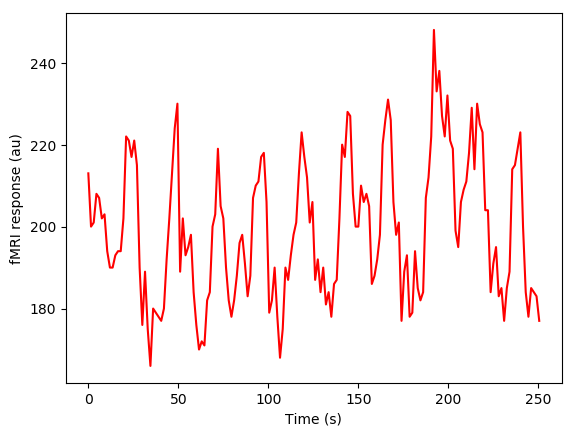

In [5]:
plot(t, timecourse, "r");
xlabel("Time (s)"); ylabel("fMRI response (au)");

In [6]:
# setting up a julia expression that can be called on one line...
demoRegressFunction = :( 
    h = figure(); 
    δ=16; 
    @manipulate for a=-δ:1:δ, b=150:1:300, c=-δ:δ; withfig(h) do 
        plot(t, timecourse, color="red"), plot(t, design*[a;b;c], color="black"), axis([0, 250, 100, 300]); xlabel("Time (s)"); ylabel("fMRI reponse (image intensity)");
        sse = sum((timecourse-design*[a;b;c]).^2);
        title(sse)
    end
end
);

In [12]:
demoFunction1 = :(
    f = figure();  
    @manipulate for a=-2:0.1:2, b=-2:0.1:2, c=-1:0.1:1; withfig(f) do 
        plot(t, a*design[:,1], t, b*design[:,2],  t, c*design[:,3]), axis([0, 250, -2, 2])
        end
end
);

In [25]:
demoFunction2 = :( 
    g = figure(); 
    @manipulate for a=-2:0.1:2, b=-2:0.1:2, c=-1:0.1:1; withfig(g) do 
        plot(t, a*design[:,1] + b*design[:,2] + c*design[:,3]), axis([0, 250, -2, 2]);
        title("Linear combination of 3 columns")
        end
end 
);

There are **three** individual components of the model. 

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_14", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-0ebff4bb-4f70-4de3-9b0e-13e3c70cb92f", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 2.0),Pair{Symbol,Any}(:min, -2.0),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 0.1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_13", 0.0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/lpzds1/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/lpzds1/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/lpzds1/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/lpzds1/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/lpzds1/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0.0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {
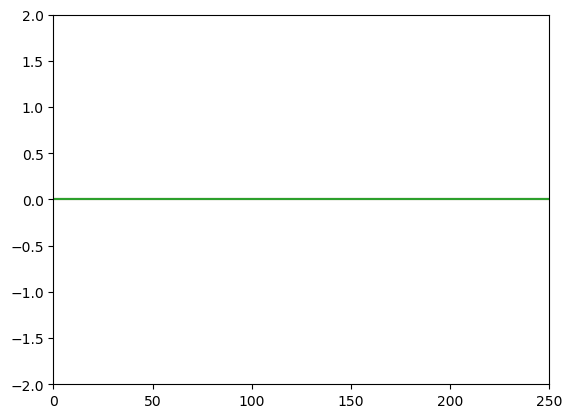
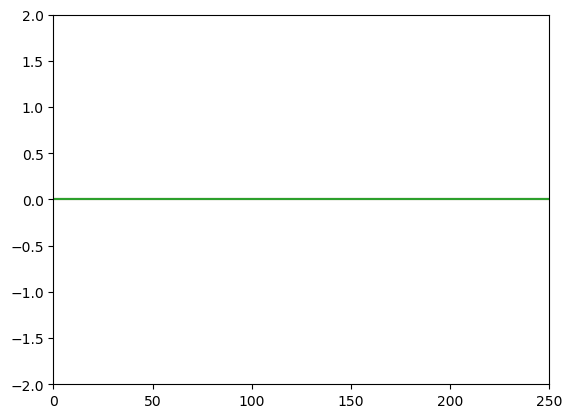

In [14]:
# run the first demo: the individual components in the model
eval(demoFunction1)

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_62", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-0b73717d-95bd-496b-9208-2d7da122ef3c", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 2.0),Pair{Symbol,Any}(:min, -2.0),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 0.1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_61", 0.0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/lpzds1/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/lpzds1/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/lpzds1/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/lpzds1/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/lpzds1/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0.0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {
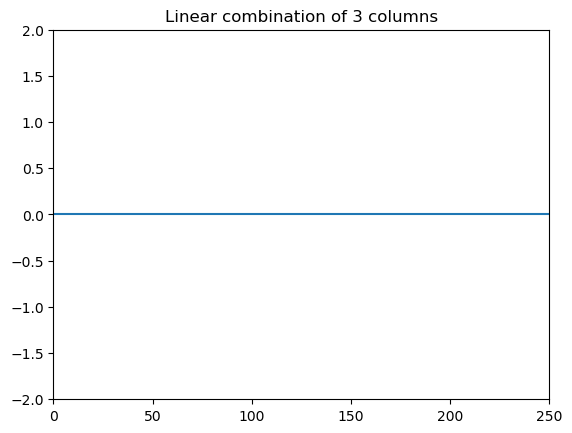
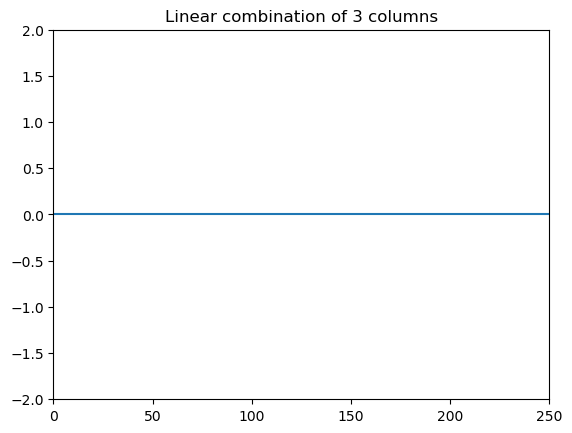

In [26]:
# run the second demo: the individual components in the model ADDED together
eval(demoFunction2)

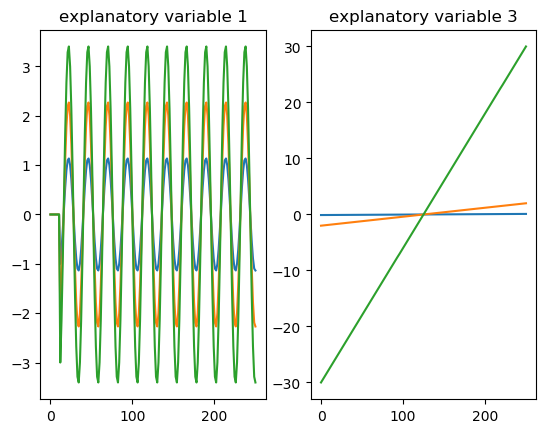

In [27]:
subplot(1,2,1)
plot(t, design[:,1] * [1;2;3]');
title("explanatory variable 1");

subplot(1,2,2)
plot(t, design[:,3] * [0.1;2;30]');
title("explanatory variable 3");

At each point in time, they simply **add** to the final result. So let's look at the **linear combination** of these three components.

To make this clearer in your mind, it might help to think of another example of *timeseries* data, e.g. temperature measurements over time: 

Adjust sliders to make the **black curve** (model) fit as closely to the **red curve** data as possible.

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_50", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-7a9e288e-8a8c-4d48-98da-c59d557bae1d", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["a"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 16),Pair{Symbol,Any}(:min, -16),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_49", 0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/lpzds1/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/lpzds1/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/lpzds1/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/lpzds1/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/lpzds1/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return thi
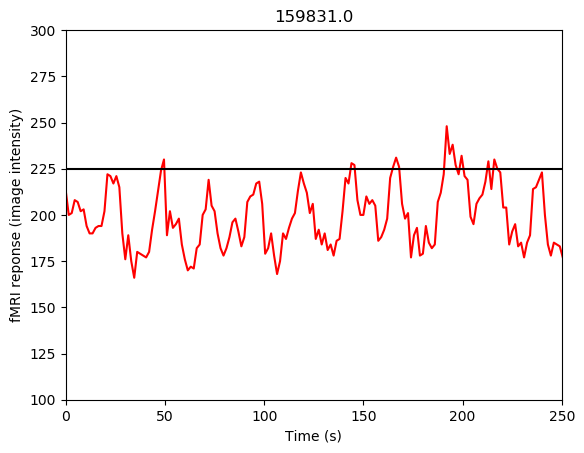
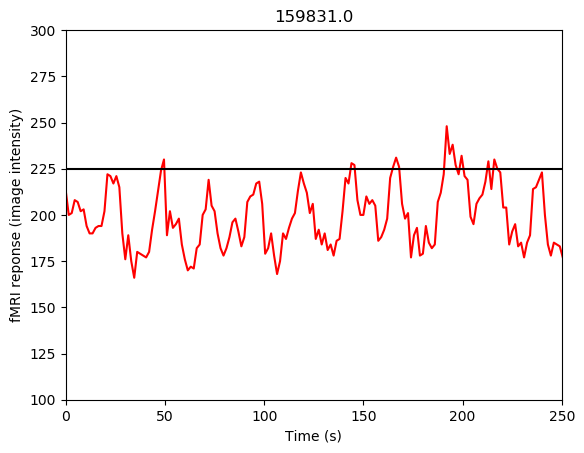

In [21]:
# interactive version of linear regression / adjusting weights
eval(demoRegressFunction)

## To find the best solution, least-squares! 

$\mathbf{y} = \mathbf{X}\mathbf{b} + \epsilon$ 

where y is data, X the design matrix ($\epsilon$ for additional noise)

$\mathbf{b} = \mathbf{X}^{\dagger}\,y$

In code this looks like this. Note the backslash ``\`` operator (not division) that solves the linear system to give you so-called $\beta$ weights



In [32]:
@show betaWeights = design\timecourse;

betaWeights = design \ timecourse = [13.0751; 199.244; 5.52676]


# Data and model on the same plot

The **model prediction** is just the **model** multiplied with the **weights** we found for each column. 

In [33]:
modelPrediction = design * betaWeights; # model prediction

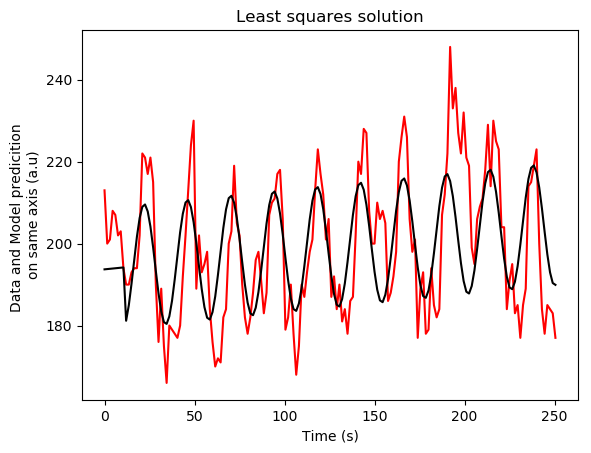

PyObject Text(0.5, 1.0, 'Least squares solution')

In [34]:
plot(t, timecourse, color="red");
# hold(true) # deprecated
plot(t, modelPrediction, color="black"); xlabel("Time (s)"); 
ylabel("Data and Model predicition \non same axis (a.u)");
title("Least squares solution")

And a look at the **residuals**...

In [36]:
residual = timecourse - modelPrediction;

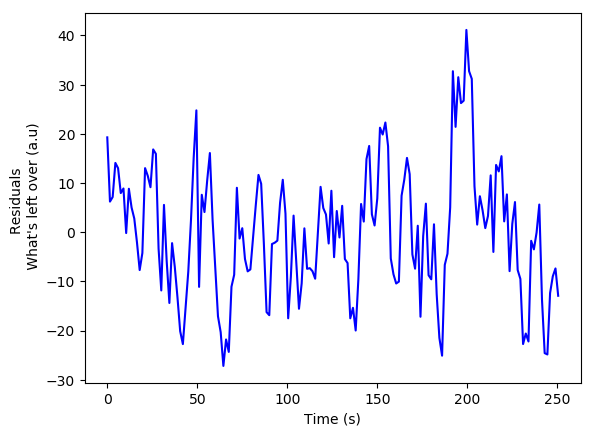

In [37]:
plot(t, residual, color="blue");
xlabel("Time (s)"); 
ylabel("Residuals \n What's left over (a.u)");

## How good is the fit?

Can look at how much is left in the *residuals* 

$\rightarrow$ ``var(resdiuals)``    $\quad$  compared to the data 

$\rightarrow$ ``var(data)``

In [ ]:
@show var(residual)
@show var(timecourse)
@show r2 = 1 - var(residual)./var(timecourse)